# Akbank Makine Öğrenmesine Giriş

## Gerekli Modüllerin ve Fonksiyonları Ekleme

In [3]:
#Veri normalizasyonu vs gibi işler için kullanılan temel modüller
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


#ML modellerinin ve eğitilmesi için gereken hazır fonksiyonlar
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#ML modellerinin veriler üzerindeki sınıflandırma veya regrasyon performanslarını bulmak için kullanılan hazır fonksiyonlar
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay,accuracy_score,f1_score,roc_auc_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

#Görselleştirme,tablolaştırma gibi işlemlerle veri analizine bolca yardımı dokunan modüller
import matplotlib.pyplot as plt
import seaborn as sns

# https://archive.ics.uci.edu/dataset/2/adult veri setim

## Veri Setinin Import Edilmesi ve Veri Seti Üzerinde Bazı İşlemler

In [4]:
columns=["age","workclass","fnlwgt","education","education-num"
        ,"marital-status","occupation","relationship","race","sex"
        ,"capital-gain","capital-loss","hours-per-week","native-country","income"
]

df = pd.read_csv("adult/adult.data", header=None, names = columns)

max_iteration = len(df)


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Veri setimde 12 veri bulunmakta bunların 6sı int iken diğeleri kategorik değişkenlerdir yukarıdaki kod satırında sütunları isimlendirip veri setimde kaç veri noktası olduğunu gözlemledim.

## Veri Setini Dönüştürmeden Önce

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Veri setindeki kategorik değişkenleri sayısal değerlere dönüştürdüm; çünkü çok sayıda farklı iş kolu ve Amerika kültürüne özgü meslekler bulunduğundan, bu değişkenleri modellemek ve analiz etmek daha anlaşılır ve yönetilebilir hale geldi.

## Veri Setinin Son Halinin İncelenmesi

In [7]:
for column in columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype("category").cat.codes


In [8]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


## Korelasyon Tablosu

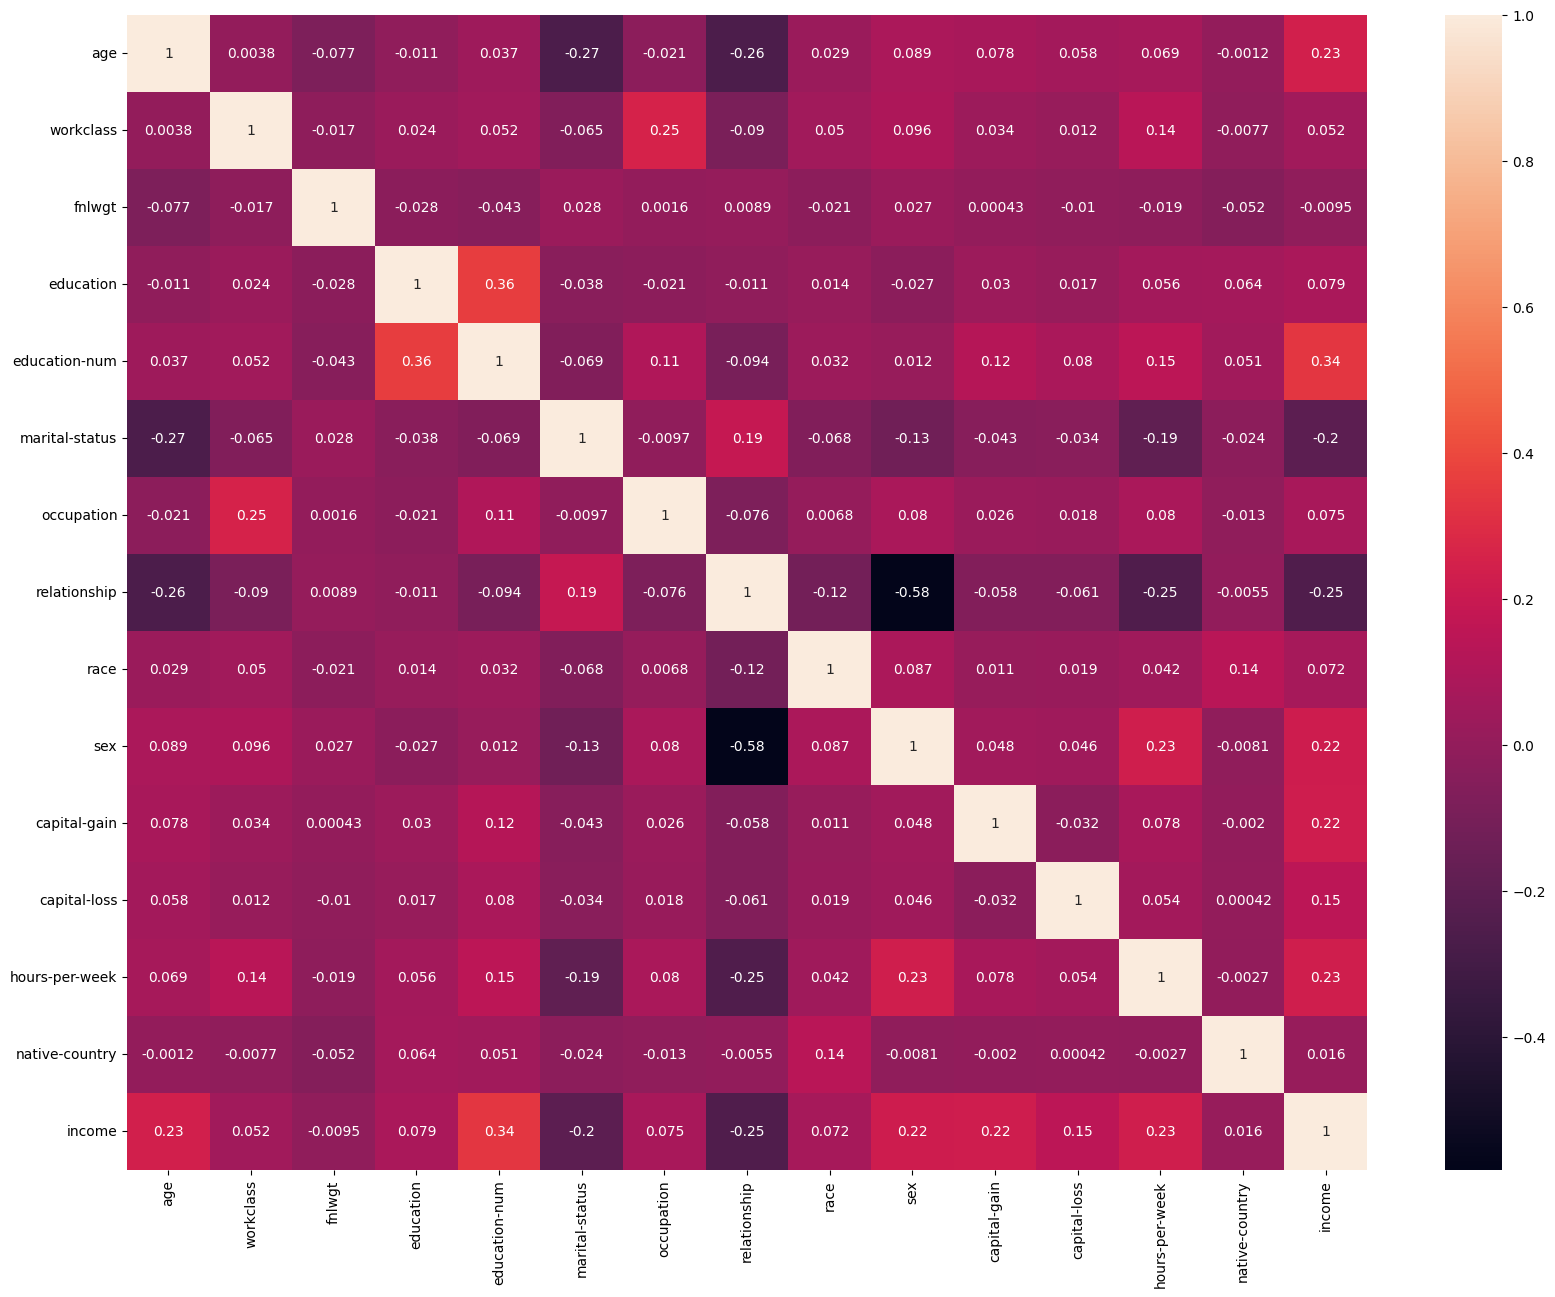

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Veri setindeki Özellik(Feature)larımız ilk 11 elemanımız yani bunlar(age,workclass,fnlwgt,    education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country) özelliklerimiz. 

Veri setimdeki Hedef(Target) ise "income" normalde veri setinde "<=50k" ve ">50k" olarak ikili bir şekilde bulumasından kaynaklı ben bu değerlere 0 ve 1 verdim.Veri setimdeki özellikleri ve hedefi seçtiğime göre artık train ve test setlerine ayırabilirim.

## Özellik ve Hedefin Tanımlanıp Test ve Trainlere Bölünmesi

In [10]:
X = df.iloc[:, :11]
y = df["income"]

# Eğitim ve test setine ayır
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# StandardScaler ile ölçekleme
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Lojistik Regrasyon ile Sınıflandırma

In [11]:
logistic_regression = LogisticRegression(max_iter=max_iteration)
logistic_regression.fit(x_train,y_train)
logistic_regression_pred = logistic_regression.predict(x_test)

#### Lojistik Regrasyonun Raporu

In [12]:
print("Lojistik Regrasyonun Sınıflandırma Rapor Sonucu")
print(classification_report(y_test,logistic_regression_pred))

Lojistik Regrasyonun Sınıflandırma Rapor Sonucu
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4972
           1       0.71      0.46      0.56      1541

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.82      0.83      0.81      6513



#### Lojistik Regrasyonun Confussion Matrixi

In [13]:

# Özellikleri standartlaştırma (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## Lineer Regrasyon

In [14]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
linear_regression_pred = linear_regression.predict(x_test)

#### Lineer Regrasyonun R2 Skoru

In [15]:
print(f"Lineer Regrasyonun R2 Skoru: {r2_score(y_test,linear_regression_pred):.3f}")

Lineer Regrasyonun R2 Skoru: 0.245


#### Lineer Regrasyonun Mean Squared Error(MSE) Performansı

In [16]:
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, linear_regression_pred):.3f}")

Mean Squared Error (MSE): 0.136


## Karar Ağaçları

In [17]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)

#### Karar Ağacının Raporu

In [18]:
print("Karar ağacının raporu: ")
print(classification_report(y_test,tree_pred))

Karar ağacının raporu: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4972
           1       0.55      0.59      0.57      1541

    accuracy                           0.79      6513
   macro avg       0.71      0.72      0.72      6513
weighted avg       0.79      0.79      0.79      6513



#### Karar Ağacının Confusion Matrixi

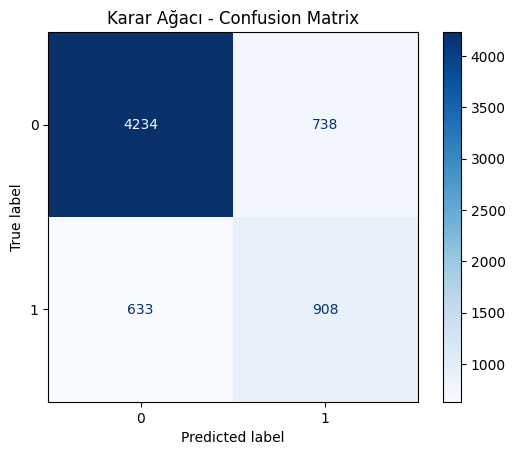

In [19]:
cm = confusion_matrix(y_test,tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Karar Ağacı - Confusion Matrix")
plt.show()

## En Yakın Komşu (k-Nearest Neighbors - KNN) Sınıflandırıcısı

In [20]:
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(x_train,y_train)
KNeighborsClassifier_pred = KNeighborsClassifier.predict(x_test)

In [21]:
print("k-Nearest Neighbors Raporu: ")
print(classification_report(y_test,KNeighborsClassifier_pred))

k-Nearest Neighbors Raporu: 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4972
           1       0.64      0.59      0.61      1541

    accuracy                           0.82      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.82      0.82      6513



#### k-Nearest Neighbors Confusion Matrix

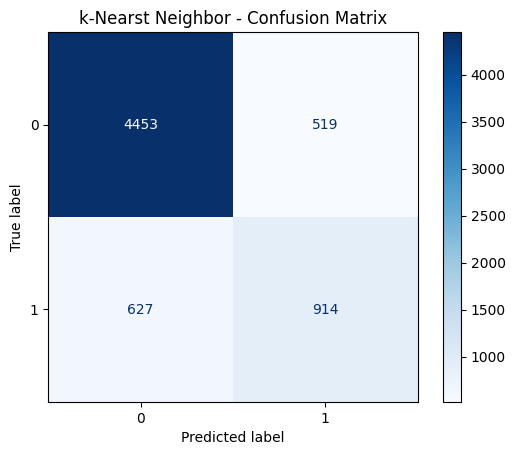

In [22]:
cm = confusion_matrix(y_test,KNeighborsClassifier_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("k-Nearst Neighbor - Confusion Matrix")
plt.show()


## Destek Vektör Makineleri (Support Vector Machines - SVM)

In [23]:
svm = SVC()
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)

#### Destek Vektör Makinelerinin Raporu

In [24]:
print("Destek Vektör Makinelerinin Raporu: ")
print(classification_report(y_test,svm_pred))


Destek Vektör Makinelerinin Raporu: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4972
           1       0.71      0.55      0.62      1541

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



#### Destek Vektör Makineleri - Confusion Matrix

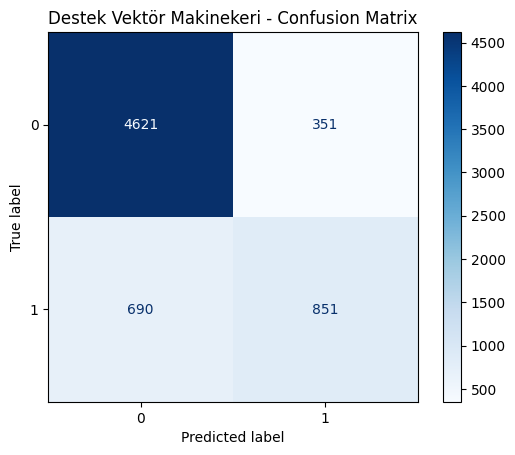

In [25]:
cm = confusion_matrix(y_test,svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Destek Vektör Makinekeri - Confusion Matrix")
plt.show()

### Algoritma Seçimi için Sonuç ve Rapor Kıyaslaması

Bu çalışmada, sınıf dengesizliği içeren bir veri seti üzerinde çeşitli makine öğrenmesi algoritmalarının (özellikle Lojistik Regresyon ve Destek Vektör Makineleri - SVM) sınıflandırma performansı karşılaştırılmıştır. Amaç, en uygun modeli belirleyerek sonraki adımlarda bu modeli temel alarak ilerlemektir.

##### Lojistik Regresyon (Logistic Regression)
Metrik	Sınıf 0	Sınıf 1
Precision	0.85	0.71
Recall	0.94	0.46
F1-Score	0.89	0.56
Support	4972	1541

Genel Doğruluk (Accuracy): 0.83

Macro Ortalama F1-Skoru: 0.72

Lojistik regresyon modeli, özellikle Sınıf 0 için yüksek doğrulukla tahmin yapabilmekte; Sınıf 1 için ise recall değeri nispeten düşük olmasına rağmen precision açısından güçlü sonuçlar vermiştir.

Bu model, daha dengeli bir performans göstermiştir.

##### Destek Vektör Makineleri (Support Vector Machines - SVM)
Metrik	Sınıf 0	Sınıf 1
Precision	0.79	0.97
Recall	1.00	0.16
F1-Score	0.88	0.28
Support	4972	1541

Genel Doğruluk (Accuracy): 0.80

Macro Ortalama F1-Skoru: 0.58

SVM modeli, Sınıf 0'ı tamamen doğru sınıflandırırken, Sınıf 1'leri tespit etmede ciddi şekilde başarısız olmuştur. Bu durum, modelin sınıf dengesizliğinden olumsuz etkilendiğini ve yüksek precision değerine rağmen düşük recall nedeniyle genel başarımın düştüğünü göstermektedir.

##### Genel Değerlendirme
Genel anlamda değerlendirildiğinde, Lojistik Regresyon modeli diğer yöntemlerle benzer doğruluk oranları sağlasa da daha dengeli bir sınıflandırma performansı ortaya koymuştur. Özellikle sınıflar arasındaki dengesiz dağılıma rağmen, hem precision hem recall açısından ortalama değerler daha tutarlı bir biçimde elde edilmiştir.

Bu nedenle, çalışma kapsamında ilerleyen aşamalarda Lojistik Regresyon modeliyle devam edilmesine karar verilmiştir.


## Hiper Parametre Optimazyonu ve Sonuçları

In [26]:
logistic_regression = LogisticRegression(max_iter=max_iteration)
logistic_regression.fit(x_train,y_train)
logistic_regression_pred = logistic_regression.predict(x_test)
print("Lojistik Regrasyonun Sınıflandırma Rapor Sonucu")
print(classification_report(y_test,logistic_regression_pred))

Lojistik Regrasyonun Sınıflandırma Rapor Sonucu
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4972
           1       0.71      0.46      0.56      1541

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.82      0.83      0.81      6513



In [27]:
logistic_regression = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],  
    'solver': ['liblinear'],
    'class_weight': [
        None,  
        'balanced', 
        {0: 1, 1: 1.5},
        {0: 1, 1: 2}, 
        {0: 1, 1: 2.5},
        {0: 0.8, 1: 2}
    ],
    'max_iter': [100, 200, 300]
}


grid = GridSearchCV(
    logistic_regression,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

# Eğitimi gerçekleştir
grid.fit(x_train, y_train)

# En iyi modeli al
best_logreg = grid.best_estimator_

# Tahmin ve değerlendirme
y_pred = best_logreg.predict(x_test)
y_pred_proba = best_logreg.predict_proba(x_test)[:, 1] # Sınıf 1 için olasılıklar

print("En iyi parametreler:", grid.best_params_)
print("CV üzerindeki en iyi F1 skoru (macro):", grid.best_score_)
print(f"Test Seti - F1 Skoru (Macro): {f1_score(y_test, y_pred, average='macro'):.4f}, ROC AUC Skoru: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nSonrası Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print()
print("Önce Lojistik Regrasyonun Sınıflandırma Rapor Sonucu")
print(classification_report(y_test,logistic_regression_pred))




En iyi parametreler: {'C': 1, 'class_weight': {0: 1, 1: 1.5}, 'max_iter': 100, 'solver': 'liblinear'}
CV üzerindeki en iyi F1 skoru (macro): 0.7315864972211676
Test Seti - F1 Skoru (Macro): 0.7398, ROC AUC Skoru: 0.8445

Sonrası Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4972
           1       0.63      0.57      0.60      1541

    accuracy                           0.82      6513
   macro avg       0.75      0.73      0.74      6513
weighted avg       0.81      0.82      0.81      6513


Önce Lojistik Regrasyonun Sınıflandırma Rapor Sonucu
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4972
           1       0.71      0.46      0.56      1541

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.82      0.83      0.81      6513



Optimizasyondan sonra modelimizin başarı oranları düşsede 1. gruba karşı olan duyarlılığı gözle büyük oranda artmıştır buda daha düşük doğruluklu daha genel bir modele dönüştürğünü anlamamızı sağlar. Ancak hiperparemetre optimizasyon sürecini daha detaylı ve bir profesyonel yapsaydı çok daha iyi sonuçlar alabilirdi.

## Sonuç ve Gerçek Hayattaki Uygulamaları

### Sonuçların Değerlendirilmesi

Bu çalışmada, UCI Adult veri seti kullanılarak bireylerin gelirlerinin 50K$'dan fazla olup olmadığını tahmin etmek için çeşitli makine öğrenmesi algoritmaları uygulanmıştır. Veri setinde yaş, eğitim, meslek, medeni durum gibi demografik ve sosyoekonomik özellikler yer almaktadır. 

Veri ön işleme adımlarında kategorik değişkenler sayısal değerlere dönüştürülmüş ve özellikler standartlaştırılmıştır. Ardından Lojistik Regresyon, Karar Ağacı, KNN ve Destek Vektör Makineleri (SVM) gibi farklı algoritmalar denenmiş ve performansları karşılaştırılmıştır. Hiperparametre optimizasyonu ile modellerin genel başarısı artırılmaya çalışılmıştır.

Model sonuçlarına göre:
- **Lojistik Regresyon** modeli, genel doğruluk ve dengeli sınıflandırma açısından iyi sonuçlar vermiştir.
- **SVM** modeli, çoğunluk sınıfını çok iyi tahmin ederken azınlık sınıfında düşük başarı göstermiştir.
- Hiperparametre optimizasyonu ile bazı modellerin azınlık sınıfa (ör. yüksek gelirli bireyler) duyarlılığı artırılmış, ancak genel doğrulukta düşüş gözlemlenmiştir.

Bu sonuçlar, veri setindeki **sınıf dengesizliğinin** modellerin performansını önemli ölçüde etkilediğini göstermektedir. Gerçek hayatta, hangi sınıfın daha önemli olduğuna göre model seçimi ve değerlendirme metrikleri değiştirilebilir.

---

### Gerçek Hayatta Uygulama Örnekleri

Bu tür bir gelir tahmin modeli, aşağıdaki alanlarda gerçek hayatta kullanılabilir:

- **Kredi Skorlama ve Bankacılık:**  
  Bankalar, müşterilerin gelir seviyesini tahmin ederek kredi başvurularında risk analizi yapabilir. Yüksek gelirli müşterilere daha avantajlı kredi teklifleri sunulabilir.

- **Sigorta Sektörü:**  
  Sigorta şirketleri, bireylerin gelir seviyesini tahmin ederek poliçe fiyatlandırmasını ve müşteri segmentasyonunu daha doğru yapabilir.

- **Pazarlama ve Hedefli Reklam:**  
  Şirketler, yüksek gelirli bireyleri tespit ederek lüks ürünler veya özel hizmetler için hedefli reklam kampanyaları oluşturabilir.

- **Kamu Politikaları ve Sosyal Yardımlar:**  
  Devlet kurumları, gelir düzeyi düşük bireyleri tespit ederek sosyal yardım ve destek programlarını daha etkin planlayabilir.

- **İK ve İşe Alım:**  
  İnsan kaynakları departmanları, adayların geçmiş verilerinden gelir tahmini yaparak maaş tekliflerini optimize edebilir.

---

### Sonuç

Çalışmada geliştirilen modeller, gelir tahmini gibi önemli bir sınıflandırma probleminde temel bir referans sunmaktadır. Gerçek hayatta, modelin başarısı ve güvenilirliği; veri kalitesi, güncelliği ve etik kullanım ilkelerine dikkat edilerek daha da artırılabilir. Ayrıca, modelin iş hedeflerine uygun olarak özelleştirilmesi ve sürekli güncellenmesi gereklidir.